# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv('Suicide rates new.csv')

In [3]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
df.shape

(236583, 7)

In [5]:
df.describe()

,Year,Total
count,236583.00000,236583.000000
mean,2006.50045,30.636225
std,3.45224,180.272636
min,2001.00000,0.000000
25%,2004.00000,0.000000
50%,2007.00000,0.000000
75%,2010.00000,6.000000
max,2012.00000,8756.000000


In [6]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [7]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

# Exploratory Data Analysis (EDA)

In [9]:
index = df['State'] =='Maharashtra'
df[index].Total.sum()

901945

In [10]:
df.groupby('State').Total.sum().sort_values(ascending=False)

State
Maharashtra          901945
West Bengal          849936
Tamil Nadu           818691
Andhra Pradesh       814059
Karnataka            734825
Kerala               538946
Madhya Pradesh       451535
Gujarat              330858
Chhattisgarh         302354
Odisha               267234
Rajasthan            255134
Uttar Pradesh        233352
Assam                172276
Haryana              147176
Delhi (Ut)            84272
Jharkhand             49720
Punjab                46350
Bihar                 46214
Tripura               45965
Puducherry            32144
Himachal Pradesh      26562
Uttarakhand           18496
Goa                   17363
Jammu & Kashmir       14821
Sikkim                 9606
A & N Islands          8109
Arunachal Pradesh      6633
Meghalaya              5415
Chandigarh             5164
Mizoram                4154
D & N Haveli           3430
Manipur                2102
Nagaland               1728
Daman & Diu            1391
Lakshadweep              50
Name: Total, d

In [12]:
S = df.groupby('Year').Total.sum()
S

Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64

In [14]:
X = S.index.values
Y = S.values

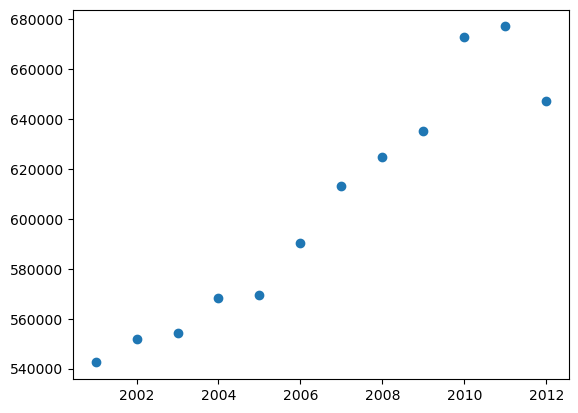

In [15]:
plt.scatter(X,Y)
plt.show()

In [17]:
df.groupby('Gender').Total.sum()

Gender
Female    2606922
Male      4641088
Name: Total, dtype: int64

In [19]:
df.groupby(['State','Year']).Total.sum().sort_values(ascending=False)

State        Year
Tamil Nadu   2012    84635
             2010    82805
West Bengal  2011    82460
Maharashtra  2012    80560
West Bengal  2010    80185
                     ...  
Lakshadweep  2002        0
             2011        0
             2005        0
             2004        0
             2001        0
Name: Total, Length: 420, dtype: int64

In [20]:
df.groupby(['State','Gender']).Total.sum().sort_values(ascending=False)

State           Gender
Maharashtra     Male      608770
Andhra Pradesh  Male      542120
Tamil Nadu      Male      512206
Karnataka       Male      491955
West Bengal     Male      484695
                           ...  
Mizoram         Female       555
Daman & Diu     Female       475
Nagaland        Female       433
Lakshadweep     Female        30
                Male          20
Name: Total, Length: 70, dtype: int64

In [24]:
df.groupby(['State','Gender','Year'])[['Total']].sum()

Total
State         Gender Year       
A & N Islands Female 2001    250
                     2002    265
                     2003    215
                     2004    205
                     2005    265
...                          ...
West Bengal   Male   2008  41845
                     2009  42470
                     2010  46505
                     2011  48120
                     2012  26040

[840 rows x 1 columns]

In [25]:
df.groupby(['Type']).Total.sum().sort_values(ascending=False)

Type
Married                                           1021774
Others (Please Specify)                            469147
By Hanging                                         460955
Primary                                            362827
Middle                                             342971
                                                   ...   
Bankruptcy or Sudden change in Economic Status       2655
Illegitimate Pregnancy                               2494
Ideological Causes/Hero Worshipping                  2118
By Machine                                           1661
Not having Children (Barrenness/Impotency             766
Name: Total, Length: 69, dtype: int64

# Applying Machine Learning Algorithm

In [26]:
X = S.index.values.reshape(-1,1)
X

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [27]:
Y = S.values
Y

array([542440, 551980, 554218, 568349, 569545, 590543, 613119, 625014,
       635429, 672926, 677159, 647288], dtype=int64)

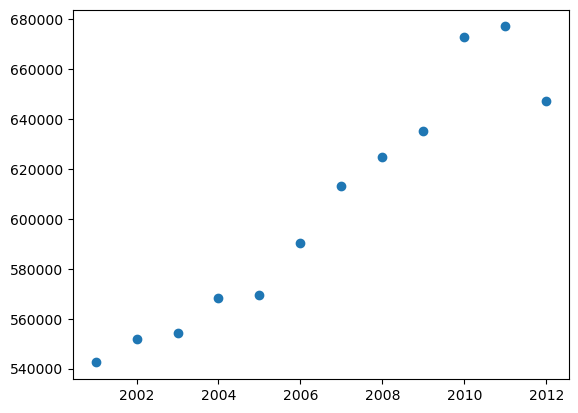

In [28]:
plt.scatter(X,Y)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [30]:
reg.coef_

array([12710.76223776])

In [31]:
reg.intercept_

-24900143.596736595

In [32]:
Y

array([542440, 551980, 554218, 568349, 569545, 590543, 613119, 625014,
       635429, 672926, 677159, 647288], dtype=int64)

In [34]:
yp = reg.predict(X)
yp

array([534091.64102564, 546802.4032634 , 559513.16550116, 572223.92773892,
       584934.68997669, 597645.45221445, 610356.21445221, 623066.97668998,
       635777.73892774, 648488.5011655 , 661199.26340326, 673910.02564102])

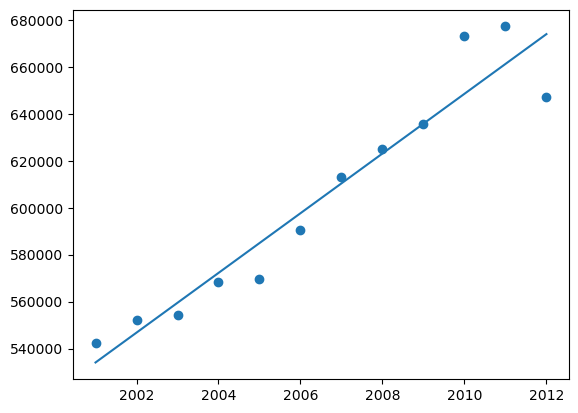

In [35]:
plt.scatter(X,Y)
plt.plot(X,yp)
plt.show()

In [36]:
reg.score(X,Y) * 100

92.03657842369778

# Predicting the number of Suicide Rates in given year

In [37]:
reg.predict([[2021]])

array([788306.88578088])

In [38]:
reg.predict([[2023]])

array([813728.41025641])